[二叉树](data_structure/binary_tree.md)

深度优先搜索（DFS，Depth-First Search）  
广度优先搜索（BFS，Breadth-First Search）

## 二叉树的四种遍历方式


- 前序遍历：**先访问根节点**，再前序遍历左子树，再前序遍历右子树
- 中序遍历：先中序遍历左子树，**再访问根节点**，再中序遍历右子树
- 后序遍历：先后序遍历左子树，再后序遍历右子树，**再访问根节点**
- 层序遍历：xxx

> - 以根访问顺序决定是什么遍历
> - 左子树都是优先右子树
> - 这里面的再x序遍历用的非常准确

函数名的意思：
- pre 前、前面
- in 中间  
- post → “后” 的意思（比如 post-war = 战后）
- order → “顺序”
- rec → 这里是 recursive 的缩写，意思是 “递归的”
- iterative（迭代）
- traverse（动词）→ 横越、穿过、走过。
- traversal（名词）→ 遍历、走一遍。

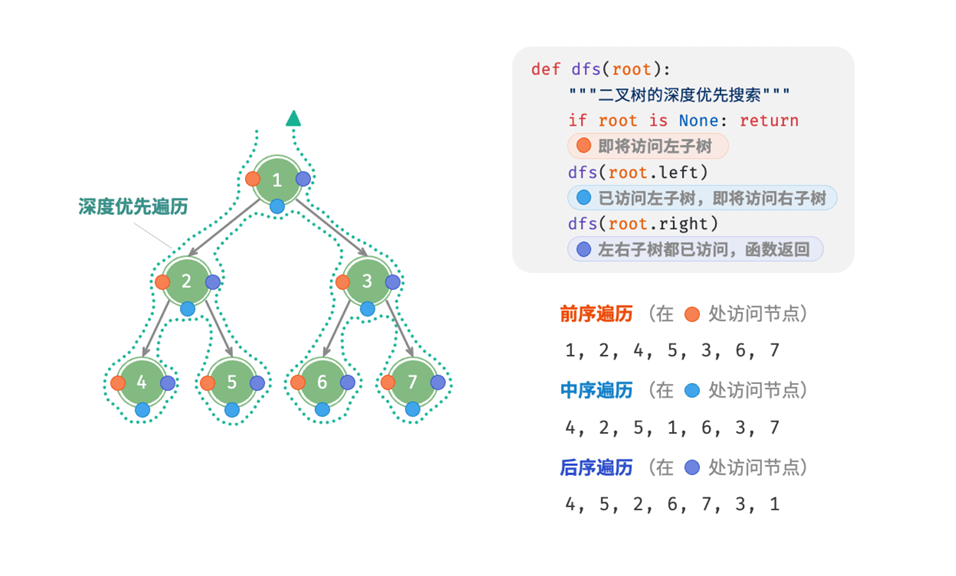

In [ ]:
def preorder_rec(root):
    if root is None:
        return
    visit(root)  # 记住模版中visit函数
    preorder_rec(root.left)
    preorder_rec(root.right)
    return

def inorder_rec(root):
    if root is None:
        return
    inorder_rec(root.left)
    visit(root)
    inorder_rec(root.right)
    return

def postorder_rec(root):
    if root is None:
        return
    postorder_rec(root.left)
    postorder_rec(root.right)
    visit(root)
    # 这里的什么也不返回就代表函数结束了
    return

非递归，遍历版本  
先访问根节点，再前序遍历左子树，再前序遍历右子树  
- 栈是后进先出 (LIFO)，所以要先压入有右孩子，在压入左孩子，这样在出栈的时候顺序就是 左孩子、右孩子

In [ ]:
s1 = [1,2,5,3,4]
s1.pop()

In [ ]:
s1.pop()

In [ ]:
class Solution:
    def preorderTraversal(self, root: TreeNode) -> List[int]:
        
        preorder = [] 
        if root is None:
            return preorder
        
        # 栈思想,s =stack 栈，初始时，栈里只有根节点。
        s = [root]  
        while len(s) > 0:
            node = s.pop() # 弹出末尾元素
            preorder.append(node.val)
            # 栈是后进先出 (LIFO)
            if node.right is not None:
                s.append(node.right)
            if node.left is not None:
                s.append(node.left)
        
        return preorder
  

中序的非递归- 中序遍历
- 先中序遍历左子树，再访问根节点，再中序遍历右子树
- 仍旧使用栈这种先进后出的数据结构来处理
- 学习数这种这数据结构，一定要学会吧它的任何一个小部分看成整体的能力

In [ ]:
  
class Solution:
    def inorderTraversal(self, root: TreeNode) -> List[int]:
        s, inorder = [], []
        node = root
        # 简化了一下代码
        # len(s) > 0 栈不为空
        while len(s) > 0 or node is not None:
            if node is not None:
                s.append(node)
                node = node.left
            else:
                node = s.pop()
                inorder.append(node.val)
                node = node.right
        return inorder
    


后序遍历非递归-后序遍历
- postorder
- 先后序遍历左子树，在后序遍历右子树，最后访问根结点
- 这里的s[-1] 和 s.pop() 设计的很巧妙
- 核心就是：根节点必须在右节点弹出之后，再弹出，根结点最后弹出

In [ ]:
class Solution:
    def postorderTraversal(self, root: TreeNode) -> List[int]:

        s, postorder = [], []
        node, last_visit = root, None
        
        while len(s) > 0 or node is not None:
            if node is not None:
                s.append(node)
                node = node.left
            else:
                peek = s[-1]
                if peek.right is not None and last_visit != peek.right:
                    node = peek.right
                else:
                    last_visit = s.pop()
                    postorder.append(last_visit.val)
        
        
        return postorder

DFS 深度搜索-从下向上（分治法）
- python 语法特性 [1] + [] + [] 是[1]
- DFS 深度搜索（从上到下） 和分治法区别：前者一般将最终结果通过指针参数传入，后者一般递归返回结果最后合并

分治法应用  
先分别处理局部，再合并结果  

适用场景  

快速排序  
归并排序  
二叉树相关问题  
分治法模板  

递归返回条件  
分段处理  
合并结果  

In [15]:
[2] + [4] + [5]

[2, 4, 5]

In [ ]:
class Solution:
    def preorderTraversal(self, root: TreeNode) -> List[int]:
        
        if root is None:
            return []
        
        left_result = self.preorderTraversal(root.left)
        right_result = self.preorderTraversal(root.right)
        
        return [root.val] + left_result + right_result

In [11]:
import collections
list = [1,1,2,1,5,3,6,7,8,5,6,41,2,3,1,5,2,41,]
collections.Counter(list)

Counter({1: 4, 2: 3, 5: 3, 3: 2, 6: 2, 41: 2, 7: 1, 8: 1})

In [12]:
levels = []
levels.append([])
levels.append([])
levels


[[], []]

In [14]:
# appendleft(x)	在 左端 添加元素	d.appendleft(1) → d: [1, 3, 5]
# append(x)	在 右端 添加元素	d.append(5) → d: [3, 5]
import collections
bfs = collections.deque([3])
bfs.append(1)
bfs.appendleft(8)
bfs

deque([8, 3, 1])

BFS 层次遍历
- 这是一个相比于前中后是一个特殊的遍历，只有这个用了BFS
- levelOrder、levels、level
- 双端队列
- 只有非递归实现版本吧！


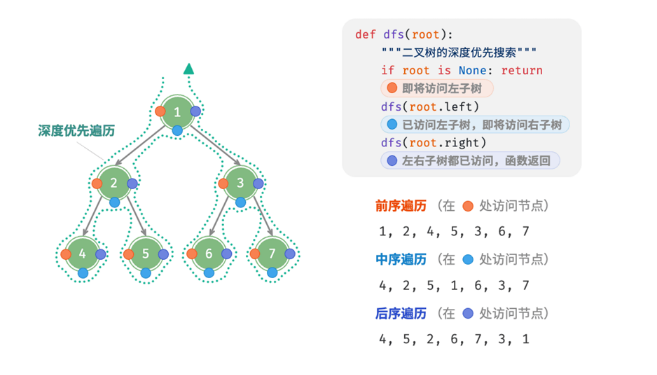

In [ ]:
class Solution:
    def levelOrder(self, root: TreeNode) -> List[List[int]]:
        
        levels = []
        if root is None:
            return levels
        
        # 初始化一个双端队列只有一个元素
        bfs = collections.deque([root])
        
        while len(bfs) > 0:

            levels.append([])
            
            level_size = len(bfs)
            for _ in range(level_size):
                node = bfs.popleft()
                levels[-1].append(node.val)
                
                if node.left is not None:
                    bfs.append(node.left)
                if node.right is not None:
                    bfs.append(node.right)
        
        return levels

## 上面的总结
- 三种遍历的递归和非递归版本
- 前序遍历的递归版本中，DFS和分治法，这两中都是递归，好像是出口不一样
- 层次遍历BFS，这个不是递归哦
- 分治法也有迭代和递归两种版本

## 常见题目示例
看懂模板后，一定要不借助任何提示，不卡顿的学出代码才算过关，有任何卡顿都要重新写。并且把卡住的地方总结再笔记里面

### maximum-depth-of-binary-tree

笔记在对应的md 里面